Generate plots based on parametric dataset (var alpha, fr and tau, 100 000 signals, 10 min length, spike_trains_3params_var_len600sec_100000.pkl)

In [1]:
import numpy as np
import pandas as pd
import pickle

from isttc.scripts.cfg_global import project_folder_path

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
results_folder = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau\\'
fig_folder = project_folder_path + 'results\\synthetic\\figures\\'

In [3]:
save_fig = False

### Load data

In [4]:
# full signal
tau_full_long_df = pd.read_pickle(results_folder + 'tau_full_long_df.pkl')
print(f'len tau_full_long_df {len(tau_full_long_df)}')

acf_full_df = tau_full_long_df.query('method == "acf_full"')[['unit_id','fr', 'alpha', 'lv', 'tau_ms_true', 'tau_diff_rel']].copy()
isttc_full_df = tau_full_long_df.query('method == "isttc_full"')[['unit_id','fr', 'alpha', 'lv', 'tau_ms_true', 'tau_diff_rel']].copy()

tau_full_wide_df = acf_full_df.merge(isttc_full_df, suffixes=('_acf', '_isttc'), 
                                          on=['unit_id','fr', 'lv', 'alpha', 'tau_ms_true'], 
                                          how='left')
tau_full_wide_df.reset_index(inplace=True, drop=True)
print(f'len tau_full_wide_df {len(tau_full_wide_df)}')

tau_full_wide_df.columns

len tau_full_long_df 199316
len tau_full_wide_df 99658


Index(['unit_id', 'fr', 'alpha', 'lv', 'tau_ms_true', 'tau_diff_rel_acf',
       'tau_diff_rel_isttc'],
      dtype='object')

In [5]:
# trials
tau_trials_long_df = pd.read_pickle(results_folder + 'tau_trials_long_df.pkl')
print(f'len tau_trials_long_df {len(tau_trials_long_df)}')

# PersonR vs iSTTC concat 
pearsonr_trials_df = tau_trials_long_df.query('method == "pearsonr_trial_avg"')[['unit_id','fr', 'alpha', 'lv', 
                                                                                      'tau_ms_true', 'tau_diff_rel']].copy()
isttc_con_trials_df = tau_trials_long_df.query('method == "sttc_trial_concat"')[['unit_id','fr', 'alpha', 'lv', 
                                                                                         'tau_ms_true', 'tau_diff_rel']].copy()

tau_trials_pearsonr_con_wide_df = pearsonr_trials_df.merge(isttc_con_trials_df, suffixes=('_pearsonr', '_sttc_concat'), 
                                          on=['unit_id','fr', 'lv', 'alpha', 'tau_ms_true'], 
                                          how='left')
tau_trials_pearsonr_con_wide_df.reset_index(inplace=True, drop=True)
print(f'len tau_trials_pearsonr_con_wide_df {len(tau_trials_pearsonr_con_wide_df)}')
print(tau_trials_pearsonr_con_wide_df.columns)

# PearsonR vs iSTTC avg (not included in the paper)
isttc_avg_trials_df = tau_trials_long_df.query('method == "sttc_trial_avg"')[['unit_id','fr', 'alpha', 'lv', 'tau_ms_true', 'tau_diff_rel']].copy()

tau_trials_pearsonr_avg_wide_df = pearsonr_trials_df.merge(isttc_avg_trials_df, suffixes=('_pearsonr', '_sttc_avg'), 
                                          on=['unit_id','fr', 'lv', 'alpha', 'tau_ms_true'], 
                                          how='left')
tau_trials_pearsonr_avg_wide_df.reset_index(inplace=True, drop=True)
print(f'len tau_trials_pearsonr_avg_wide_df {len(tau_trials_pearsonr_avg_wide_df)}')
print(tau_trials_pearsonr_avg_wide_df.columns)

len tau_trials_long_df 242847
len tau_trials_pearsonr_con_wide_df 80949
Index(['unit_id', 'fr', 'alpha', 'lv', 'tau_ms_true', 'tau_diff_rel_pearsonr',
       'tau_diff_rel_sttc_concat'],
      dtype='object')
len tau_trials_pearsonr_avg_wide_df 80949
Index(['unit_id', 'fr', 'alpha', 'lv', 'tau_ms_true', 'tau_diff_rel_pearsonr',
       'tau_diff_rel_sttc_avg'],
      dtype='object')


### Plots

In [6]:
color_acf_full = '#718190'
color_isttc_full = '#1ba9e2' 
color_pearson_trail_avg = '#f4a91c' 
color_sttc_trail_avg =  '#a49fce' 
color_sttc_trail_concat = '#955da2' 

trials_colors = [color_pearson_trail_avg, color_sttc_trail_avg, color_sttc_trail_concat]

#### iSTTC vs ACF on full signal 

Figure 2C

Figure 2D (in the paper plots generated in R are included)

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,2.5))

norm = TwoSlopeNorm(vcenter=0)

hb0 = axes[0].hexbin(
    x=tau_plot_wide_df['fr'], y=tau_plot_wide_df['alpha'],
    C=tau_plot_wide_df['tau_diff_rel_isttc'] - tau_plot_wide_df['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='RdBu_r',
    norm = norm,
    mincnt=1                    
)

p95_hb0 = np.percentile(np.abs(hb0.get_array()), 95)
print(p95_hb0)

hb1 = axes[1].hexbin(
    x=tau_plot_wide_df['tau_ms_true'], y=tau_plot_wide_df['alpha'],
    C=tau_plot_wide_df['tau_diff_rel_isttc'] - tau_plot_wide_df['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='RdBu_r',
    norm = norm,
    mincnt=1   
)

p95_hb1 = np.percentile(np.abs(hb1.get_array()), 95)
print(p95_hb1)

bar_lim = np.max([p95_hb0, p95_hb1])

hb0.set_clim(-bar_lim, bar_lim)
hb1.set_clim(-bar_lim, bar_lim)
print(bar_lim)

fig.colorbar(hb0, ax=axes[0], shrink=1)
fig.colorbar(hb1, ax=axes[1], shrink=1)

axes[0].set_xlabel('Firing rate (hz)')
axes[1].set_xlabel('Intrinsic timescale (ms)')
axes[1].set_xticks(np.linspace(50, 300, 6))

fig.suptitle('iSTTC - ACF relative error (abs(tau - tau_true)/tau_true * 100), \n < 0: iSTTC error is lower, > 0: ACF error is lower', y=1.05)

for ax in axes.flat:
    sns.despine(ax=ax)
    ax.set_ylabel('Excitation strength (a.u.)')
    ax.set_ylim([0.1, 0.9])
    ax.set_yticks(np.linspace(0.1, 0.9, 5))

if save_fig:
    plt.savefig(fig_folder + 'taus_isttc_vs_acf_ree_hexbin.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_isttc_vs_acf_ree_hexbin.svg' , bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15, 3), sharey=False)

sns.regplot(x=tau_plot_wide_df['fr'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_acf']), scatter=None, ax=axes[0], 
            label='acf_full', color=color_acf_full)
sns.regplot(x=tau_plot_wide_df['fr'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_isttc']), scatter=None, ax=axes[0], 
            label='isttc_full', color=color_isttc_full)
axes[0].legend(frameon=False)

sns.regplot(x=tau_plot_wide_df['alpha'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_acf']), scatter=None, ax=axes[1], 
            label='acf_full', color=color_acf_full)
sns.regplot(x=tau_plot_wide_df['alpha'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_isttc']), scatter=None, ax=axes[1], 
            label='isttc_full', color=color_isttc_full)
axes[1].legend(frameon=False)

sns.regplot(x=tau_plot_wide_df['tau_ms_true'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_acf']), scatter=None, ax=axes[2], 
            label='acf_full', color=color_acf_full)
sns.regplot(x=tau_plot_wide_df['tau_ms_true'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_isttc']), scatter=None, ax=axes[2], 
            label='isttc_full', color=color_isttc_full)
axes[2].legend(frameon=False)


axes[0].set_xlabel('Firing rate (Hz)')
axes[1].set_xlabel('Excitation strength (a.u.)')
axes[2].set_xlabel('Intrinsic timescale (ms)')

for ax in axes.flat:
    ax.set_ylabel('Log10 diff(IT, \nground truth) (ms)')

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'taus_isttc_vs_acf_ree_regplot.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_isttc_vs_acf_ree_regplot.svg' , bbox_inches='tight')

#### iSTTC vs ACF on full signal, Lv

Supp Figure 2C-D, in C, D right and D left inset plots generated in R are used 

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,2.5))

norm = TwoSlopeNorm(vcenter=0)

hb0 = axes[0].hexbin(
    x=tau_plot_wide_df['fr'], y=tau_plot_wide_df['lv'],
    C=tau_plot_wide_df['tau_diff_rel_isttc'] - tau_plot_wide_df['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=5                    
)

hb1 = axes[1].hexbin(
    x=tau_plot_wide_df['tau_ms_true'], y=tau_plot_wide_df['lv'],
    C=tau_plot_wide_df['tau_diff_rel_isttc'] - tau_plot_wide_df['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=5  
)

vmin = np.floor(np.min([hb0.get_array().min(), hb1.get_array().min()]))
vmax = np.ceil(np.max([hb0.get_array().max(), hb1.get_array().max()]))
#print(vmin, vmax)

hb0.set_clim(vmin, vmax)
hb1.set_clim(vmin, vmax)

fig.colorbar(hb0, ax=axes[0], shrink=1)
fig.colorbar(hb1, ax=axes[1], shrink=1)

axes[0].set_xlabel('Firing rate (hz)')
axes[1].set_xlabel('Intrinsic timescale (ms)')
axes[1].set_xticks(np.linspace(50, 300, 6))

fig.suptitle('iSTTC - ACF relative error (abs(tau - tau_true)/tau_true * 100), \n < 0: iSTTC error is lower, > 0: ACF error is lower', y=1.05)

for ax in axes.flat:
    sns.despine(ax=ax)
    ax.set_ylabel('Local variation (a.u.)')
    ax.set_ylim([0.5, 3.2])
    #ax.set_yticks(np.linspace(0.1, 0.9, 5))

if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_lv.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_lv.svg' , bbox_inches='tight')

In [ ]:
# 1st - 3rd quantiles
tau_plot_wide_df_lv_subset = tau_plot_wide_df.query('lv >= 1.1 and lv <= 1.4')

fig, axes = plt.subplots(1,2, figsize=(8,2.5))

norm = TwoSlopeNorm(vcenter=0)

hb0 = axes[0].hexbin(
    x=tau_plot_wide_df_lv_subset['fr'], y=tau_plot_wide_df_lv_subset['lv'],
    C=tau_plot_wide_df_lv_subset['tau_diff_rel_isttc'] - tau_plot_wide_df_lv_subset['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=5                    
)

hb1 = axes[1].hexbin(
    x=tau_plot_wide_df_lv_subset['tau_ms_true'], y=tau_plot_wide_df_lv_subset['lv'],
    C=tau_plot_wide_df_lv_subset['tau_diff_rel_isttc'] - tau_plot_wide_df_lv_subset['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=5  
)

vmin = np.floor(np.min([hb0.get_array().min(), hb1.get_array().min()]))
vmax = np.ceil(np.max([hb0.get_array().max(), hb1.get_array().max()]))
#print(vmin, vmax)

hb0.set_clim(vmin, vmax)
hb1.set_clim(vmin, vmax)

fig.colorbar(hb0, ax=axes[0], shrink=1)
fig.colorbar(hb1, ax=axes[1], shrink=1)

axes[0].set_xlabel('Firing rate (hz)')
axes[1].set_xlabel('Intrinsic timescale (ms)')
axes[1].set_xticks(np.linspace(50, 300, 6))

fig.suptitle('iSTTC - ACF relative error (abs(tau - tau_true)/tau_true * 100), \n < 0: iSTTC error is lower, > 0: ACF error is lower', y=1.05)

for ax in axes.flat:
    sns.despine(ax=ax)
    ax.set_ylabel('Local variation (a.u.)')
    ax.set_ylim([1.09, 1.41])
    #ax.set_yticks(np.linspace(0.1, 0.9, 5))

if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_lv_subset.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_lv_subset.svg' , bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15, 3), sharey=False)

sns.regplot(x=tau_plot_wide_df['alpha'].values, y=tau_plot_wide_df['lv'], scatter=None, ax=axes[0], color='k')
axes[0].legend(frameon=False)

sns.regplot(x=tau_plot_wide_df['lv'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_acf']), scatter=None, ax=axes[1], 
            label='acf_full', color=color_acf_full)
sns.regplot(x=tau_plot_wide_df['lv'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_isttc']), scatter=None, ax=axes[1], 
            label='isttc_full', color=color_isttc_full)
axes[1].legend(frameon=False)

sns.kdeplot(
    data=tau_plot_wide_df, 
    x="lv", 
    fill=True, 
    alpha=0.3,
    ax=axes[2]
)

axes[0].set_xlabel('Excitation strength (a.u.)')
axes[0].set_ylabel('Local variation (a.u.)')

axes[1].set_xlabel('Local variation (a.u.)')
axes[1].set_ylabel('Log10 diff(IT, \nground truth) (ms)')

axes[2].set_xlabel('Local variation (a.u.)')

for ax in axes.flat:
    sns.despine(ax=ax)

if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_diff_regplot_lv.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_diff_regplot_lv.svg' , bbox_inches='tight')

#### PersonR vs iSTTC concat vs iSTTC avg

C:\Users\ipochino\AppData\Local\anaconda3\envs\isttc\Lib\site-packages\numpy\lib\_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


3.3585661122215154
3.36406953604485
3.36406953604485


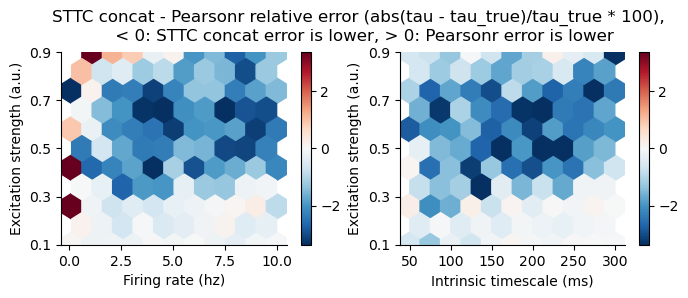

In [8]:
fig, axes = plt.subplots(1,2, figsize=(8,2.5))

norm = TwoSlopeNorm(vcenter=0)

hb0 = axes[0].hexbin(
    x=tau_trials_pearsonr_con_wide_df['fr'], y=tau_trials_pearsonr_con_wide_df['alpha'],
    C=tau_trials_pearsonr_con_wide_df['tau_diff_rel_sttc_concat'] - tau_trials_pearsonr_con_wide_df['tau_diff_rel_pearsonr'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='RdBu_r',
    norm = norm,
    mincnt=1                    
)

p95_hb0 = np.percentile(np.abs(hb0.get_array()), 95)
print(p95_hb0)

hb1 = axes[1].hexbin(
    x=tau_trials_pearsonr_con_wide_df['tau_ms_true'], y=tau_trials_pearsonr_con_wide_df['alpha'],
    C=tau_trials_pearsonr_con_wide_df['tau_diff_rel_sttc_concat'] - tau_trials_pearsonr_con_wide_df['tau_diff_rel_pearsonr'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='RdBu_r',
    norm = norm,
    mincnt=1   
)

p95_hb1 = np.percentile(np.abs(hb1.get_array()), 95)
print(p95_hb1)

bar_lim = np.max([p95_hb0, p95_hb1])

hb0.set_clim(-bar_lim, bar_lim)
hb1.set_clim(-bar_lim, bar_lim)
print(bar_lim)

fig.colorbar(hb0, ax=axes[0], shrink=1)
fig.colorbar(hb1, ax=axes[1], shrink=1)

axes[0].set_xlabel('Firing rate (hz)')
axes[1].set_xlabel('Intrinsic timescale (ms)')
axes[1].set_xticks(np.linspace(50, 300, 6))

fig.suptitle('STTC concat - Pearsonr relative error (abs(tau - tau_true)/tau_true * 100), \n < 0: STTC concat error is lower, > 0: Pearsonr error is lower', y=1.05)

for ax in axes.flat:
    sns.despine(ax=ax)
    ax.set_ylabel('Excitation strength (a.u.)')
    ax.set_ylim([0.1, 0.9])
    ax.set_yticks(np.linspace(0.1, 0.9, 5))

if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_trials_perasonr_concat.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_trials_perasonr_concat.svg' , bbox_inches='tight')

1.900597358824091
1.3458863238116674
1.900597358824091


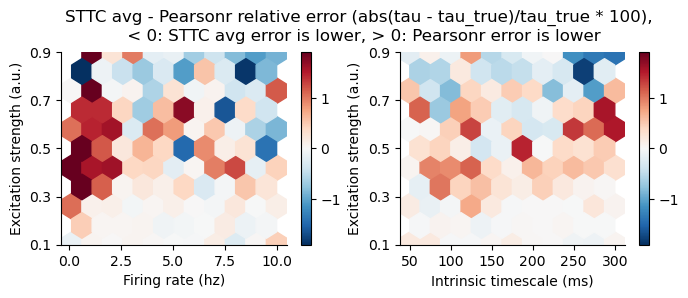

In [9]:
fig, axes = plt.subplots(1,2, figsize=(8,2.5))

norm = TwoSlopeNorm(vcenter=0)

hb0 = axes[0].hexbin(
    x=tau_trials_pearsonr_avg_wide_df['fr'], y=tau_trials_pearsonr_avg_wide_df['alpha'],
    C=tau_trials_pearsonr_avg_wide_df['tau_diff_rel_sttc_avg'] - tau_trials_pearsonr_avg_wide_df['tau_diff_rel_pearsonr'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='RdBu_r',
    norm = norm,
    mincnt=1                    
)

p95_hb0 = np.percentile(np.abs(hb0.get_array()), 95)
print(p95_hb0)

hb1 = axes[1].hexbin(
    x=tau_trials_pearsonr_avg_wide_df['tau_ms_true'], y=tau_trials_pearsonr_avg_wide_df['alpha'],
    C=tau_trials_pearsonr_avg_wide_df['tau_diff_rel_sttc_avg'] - tau_trials_pearsonr_avg_wide_df['tau_diff_rel_pearsonr'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='RdBu_r',
    norm = norm,
    mincnt=1   
)

p95_hb1 = np.percentile(np.abs(hb1.get_array()), 95)
print(p95_hb1)

bar_lim = np.max([p95_hb0, p95_hb1])

hb0.set_clim(-bar_lim, bar_lim)
hb1.set_clim(-bar_lim, bar_lim)
print(bar_lim)

fig.colorbar(hb0, ax=axes[0], shrink=1)
fig.colorbar(hb1, ax=axes[1], shrink=1)

axes[0].set_xlabel('Firing rate (hz)')
axes[1].set_xlabel('Intrinsic timescale (ms)')
axes[1].set_xticks(np.linspace(50, 300, 6))

fig.suptitle('STTC avg - Pearsonr relative error (abs(tau - tau_true)/tau_true * 100), \n < 0: STTC avg error is lower, > 0: Pearsonr error is lower', y=1.05)

for ax in axes.flat:
    sns.despine(ax=ax)
    ax.set_ylabel('Excitation strength (a.u.)')
    ax.set_ylim([0.1, 0.9])
    ax.set_yticks(np.linspace(0.1, 0.9, 5))

if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_trials_perasonr_avg.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff_trials_perasonr_avg.svg' , bbox_inches='tight')